In [1]:
!pip install shap treeinterpreter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import shap
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Breakdown of the Code:

1. **Loaded the Iris Dataset and Trained a Random Forest Model**:
   - Imported the Iris dataset and trained a `RandomForestClassifier` model using this dataset.
   - This provided the basis for generating predictions and analyzing feature importance.

2. **Extracted Predictions, Bias, and Feature Contributions Using TreeInterpreter**:
   - Using the `treeinterpreter` library, we obtained the model's predictions, bias terms, and the contributions of each feature to those predictions.
   - This step was crucial for breaking down the model's predictions into interpretable components.

3. **Selected Contributions for a Specific Class**:
   - Focused on the contributions for Class 0 by selecting the corresponding slice from the `contributions` array.
   - This allowed us to visualize the contributions specifically for that class.

4. **Created a SHAP Explanation Object from TreeInterpreter Contributions**:
   - Wrapped the `treeinterpreter` contributions in a SHAP `Explanation` object.
   - This object included the feature contributions (`shap_values`), base values (`bias`), the original input data (`X`), and the feature names.

5. **Generated a SHAP Summary Plot**:
   - Created a SHAP summary plot (often visualized as a beeswarm plot) to show the distribution of SHAP values for each feature across all instances.
   - This plot helped us understand which features had the most significant impact on the predictions.

6. **Generated a SHAP Waterfall Plot**:
   - Generated a waterfall plot to visualize the contributions of each feature to the prediction of a single instance (the first instance in this case).
   - This detailed visualization helped us understand how individual feature values contributed to the model's output for a specific prediction.

7. **Generated a SHAP Bar Plot**:
   - Computed the mean absolute SHAP values across all instances and used them to create a bar plot.
   - This plot showed the overall importance of each feature in the model, indicating which features were most influential across the entire dataset.

8. **Effectively Leveraged SHAP’s Visualization Framework**:
   - By converting `treeinterpreter` outputs into a SHAP `Explanation` object, we utilized SHAP's powerful visualization tools to analyze and interpret the model’s predictions and feature importance comprehensively.

## Example 1

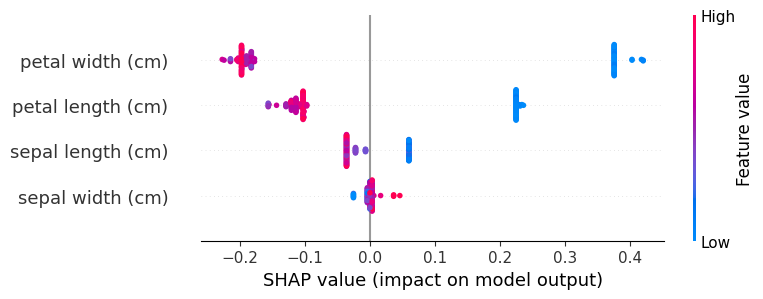

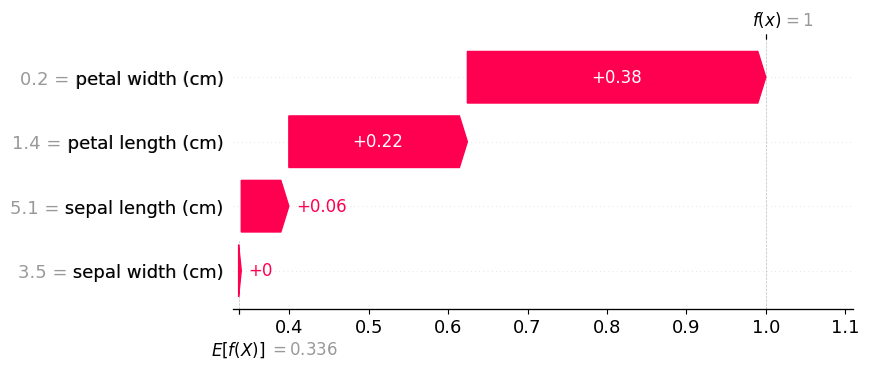

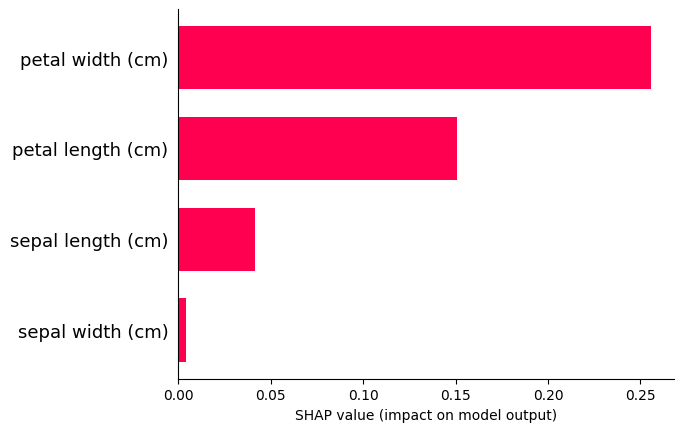

In [4]:
# Load dataset and train a model
data = load_iris()
X, y = data.data, data.target
model = RandomForestClassifier()
model.fit(X, y)

# Use treeinterpreter to get the prediction, bias, and contributions
prediction, bias, contributions = ti.predict(model, X)

# contributions.shape is (n_samples, n_features, n_classes)
# We reduce the dimensionality by selecting one class
shap_values = contributions[:, :, 0]  # Choose class 0 for visualization

# Creating a SHAP Explanation object
explainer = shap.Explainer(model)
shap_object = shap.Explanation(
    values=shap_values,
    base_values=bias[:, 0],  # Base values should match the selected class
    data=X,
    feature_names=data.feature_names
)

# Generate SHAP plots
shap.summary_plot(shap_object.values, shap_object.data, feature_names=shap_object.feature_names)
shap.waterfall_plot(shap_object[0])  # Example for the first instance

# For the bar plot, extract the mean absolute values across all instances
mean_abs_shap_values = np.abs(shap_object.values).mean(axis=0)
shap.bar_plot(mean_abs_shap_values, feature_names=shap_object.feature_names)

## Example 2

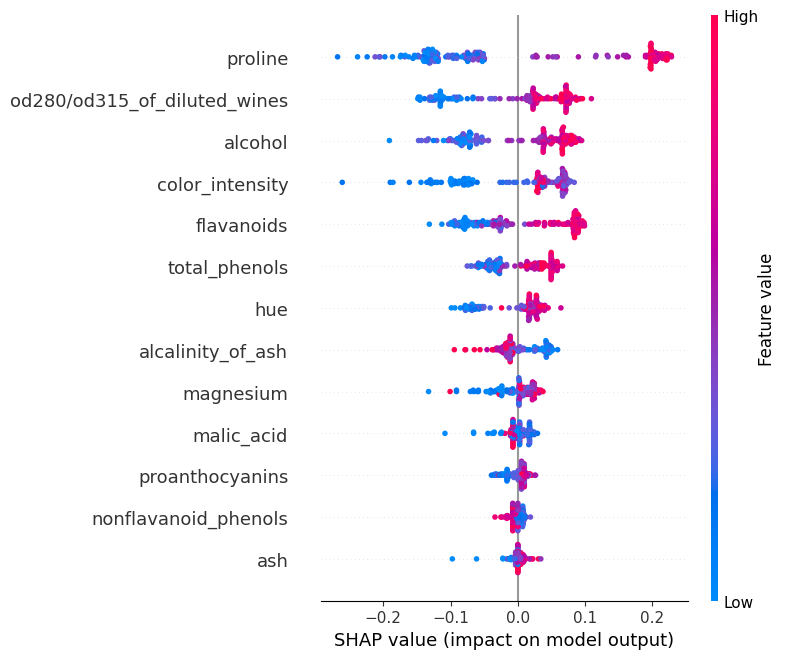

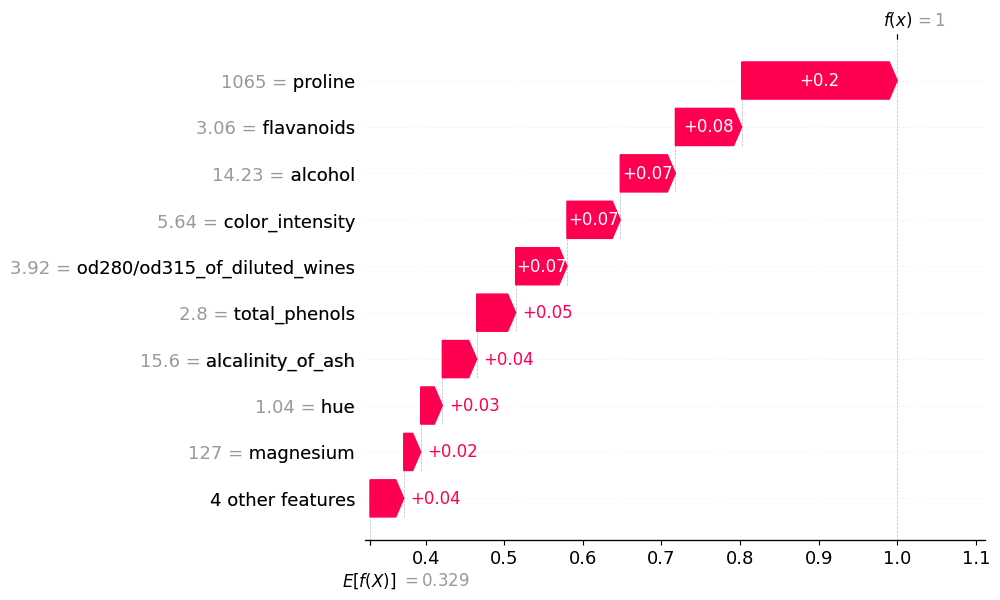

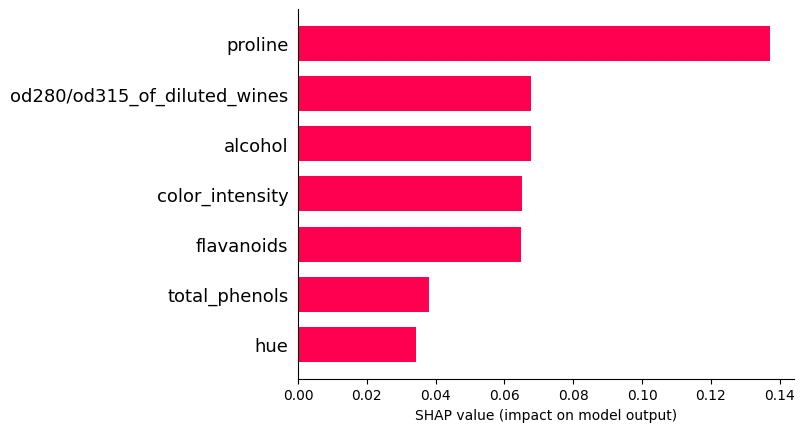

In [5]:
# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target
model = RandomForestClassifier()
model.fit(X, y)

# Use treeinterpreter to get the prediction, bias, and contributions
prediction, bias, contributions = ti.predict(model, X)

# contributions.shape is (n_samples, n_features, n_classes)
# We reduce the dimensionality by selecting one class
shap_values = contributions[:, :, 0]  # Choose class 0 for visualization

# Creating a SHAP Explanation object
explainer = shap.Explainer(model)
shap_object = shap.Explanation(
    values=shap_values,
    base_values=bias[:, 0],  # Base values should match the selected class
    data=X,
    feature_names=data.feature_names
)

# Generate SHAP plots
shap.summary_plot(shap_object.values, shap_object.data, feature_names=shap_object.feature_names)
shap.waterfall_plot(shap_object[0])  # Example for the first instance

# For the bar plot, extract the mean absolute values across all instances
mean_abs_shap_values = np.abs(shap_object.values).mean(axis=0)
shap.bar_plot(mean_abs_shap_values, feature_names=shap_object.feature_names)

## Example 3

1. **Loaded the Wine Dataset**:
   - The dataset has been switched from the Iris dataset to the Wine dataset, which includes 13 features and 3 classes of wine.

2. **Selected SHAP Values for Two Different Classes**:
   - Instead of focusing on just one class, SHAP values are now calculated for two different classes (Class 0 and Class 1). This involves extracting contributions specific to each class from the `treeinterpreter` output.
   
3. **Created Separate SHAP Explanation Objects for Each Class**:
   - Two separate SHAP `Explanation` objects are created: one for Class 0 and another for Class 1. Each object contains the SHAP values, base values, input data, and feature names specific to that class.

4. **Sequential Visualization for Two Classes**:
   - SHAP visualizations (summary plot, waterfall plot, and bar plot) are generated separately for Class 0 and Class 1.
   - This allows for a side-by-side comparison of feature contributions and importance between the two classes.

These changes extend the analysis to multiple classes, allowing a more detailed comparison of how features contribute to different class predictions in the Wine dataset.

Class 0 SHAP Visualizations:


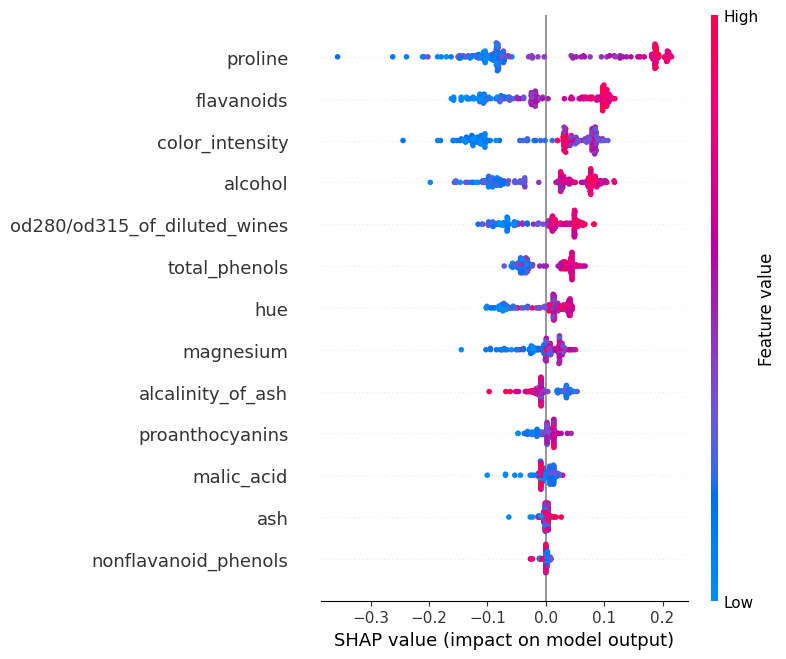

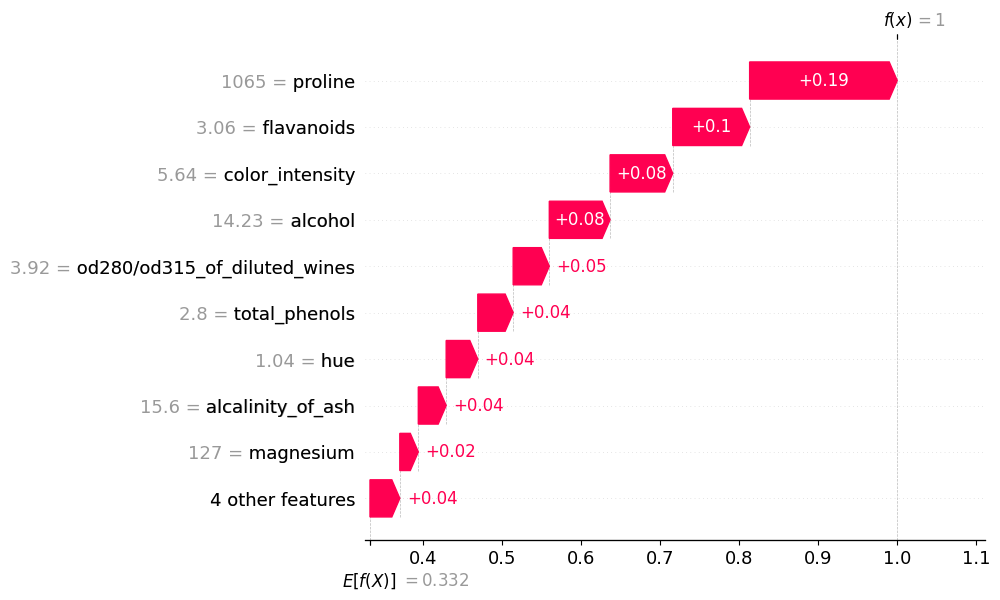

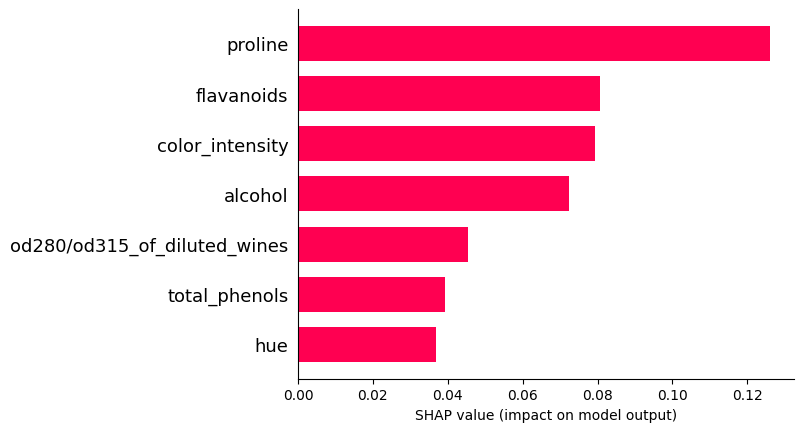


Class 1 SHAP Visualizations:


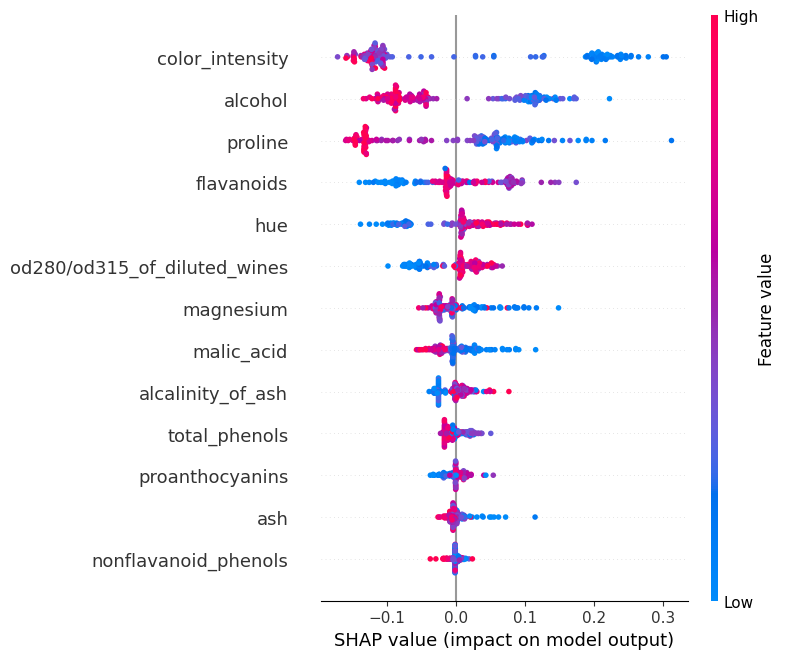

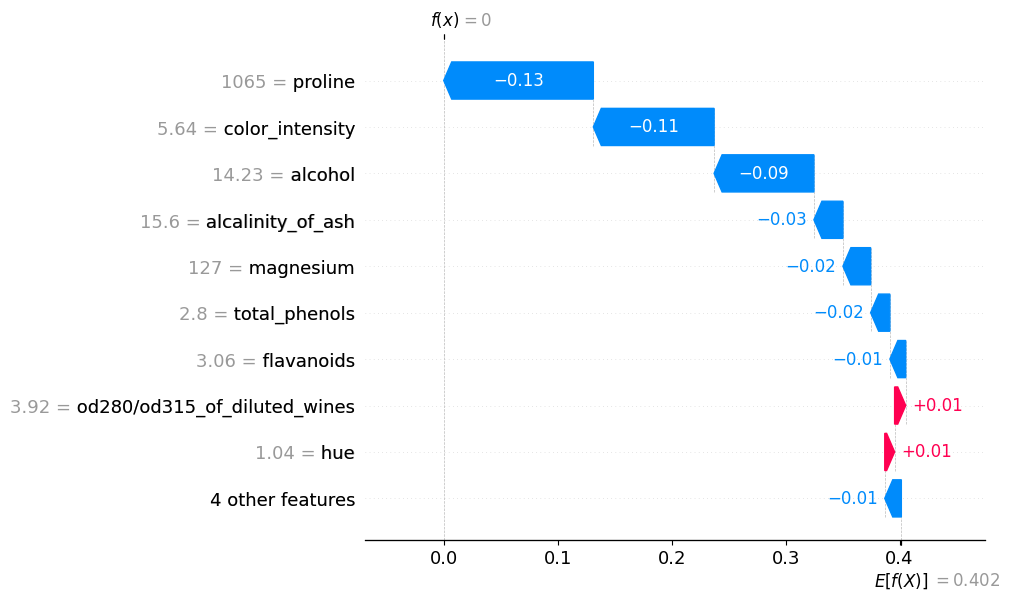

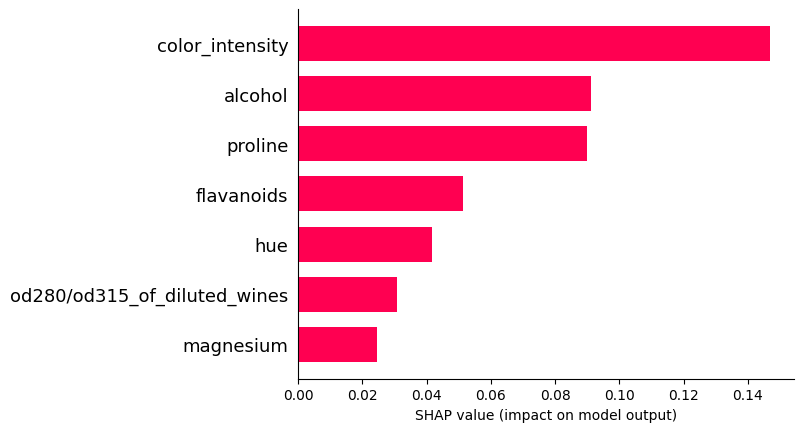

In [6]:
# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target
model = RandomForestClassifier()
model.fit(X, y)

# Use treeinterpreter to get the prediction, bias, and contributions
prediction, bias, contributions = ti.predict(model, X)

# Select SHAP values for two different classes
shap_values_class_0 = contributions[:, :, 0]  # Class 0
shap_values_class_1 = contributions[:, :, 1]  # Class 1

# Base values for each class
base_values_class_0 = bias[:, 0]
base_values_class_1 = bias[:, 1]

# Create SHAP Explanation objects for each class
explainer = shap.Explainer(model)
shap_object_class_0 = shap.Explanation(
    values=shap_values_class_0,
    base_values=base_values_class_0,
    data=X,
    feature_names=data.feature_names
)

shap_object_class_1 = shap.Explanation(
    values=shap_values_class_1,
    base_values=base_values_class_1,
    data=X,
    feature_names=data.feature_names
)

# Plotting SHAP visuals for Class 0
print("Class 0 SHAP Visualizations:")
shap.summary_plot(shap_object_class_0.values, shap_object_class_0.data, feature_names=shap_object_class_0.feature_names)
shap.waterfall_plot(shap_object_class_0[0], max_display=10)
mean_abs_shap_values_class_0 = np.abs(shap_object_class_0.values).mean(axis=0)
shap.bar_plot(mean_abs_shap_values_class_0, feature_names=shap_object_class_0.feature_names)

# Plotting SHAP visuals for Class 1
print("\nClass 1 SHAP Visualizations:")
shap.summary_plot(shap_object_class_1.values, shap_object_class_1.data, feature_names=shap_object_class_1.feature_names)
shap.waterfall_plot(shap_object_class_1[0], max_display=10)
mean_abs_shap_values_class_1 = np.abs(shap_object_class_1.values).mean(axis=0)
shap.bar_plot(mean_abs_shap_values_class_1, feature_names=shap_object_class_1.feature_names)